# Nonlinear Root Finding

In this section we investigate different methods for solving for the roots (i.e. zeros) of a nonlinear equations with a single independent variable.

##  Bisection Method

The bisection method, sometimes called the binary search method, is a simple method for finding the root, or zero, of a nonlinear equation with one unknown variable. (If the equation is linear, we can solve for the root algebraically.)

If we suppose $f$ is a continuous function defined on the interval $[a,b]$, with $f(a)$ and $f(b)$ of opposite sign (e.g., they appear on opposite sides of the root). There exists a point $p$ within the interval $[a,b]$ with $f(p) = 0$. We start the iteration by choosing a point halfway between $a$ and $b$ and checking the sign of $f(p)$. It will either have the same sign as $f(a)$ or $f(b)$. If the sign of $f(p)$ is the same as $f(a)$. Then $p$ gets set to $a$ and the process is repeated. If the sign of $f(p)$ is the same as $f(b)$, then $p$ gets set to $b$ and the process is repeated.

An animation showing the root of the function $f(x) = cos(x) - x^3$ converging to a tolerance of $0.1$ follows:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib

matplotlib.rc("animation", html="jshtml")

a = [0.2]
b = [1.3]
p = []

f = lambda x: np.cos(x) - x ** 3 if x is not None else None

FA = f(a[-1])

for i in range(20):

    p.append(None)
    a.append(a[-1])
    b.append(b[-1])
    p.append(a[-1] + (b[-1] - a[-1]) / 2)
    FP = f(p[-1])

    if np.isclose(FP, 0.0) or (b[-1] - a[-1]) / 2 < 0.10:
        break

    if np.sign(FA) * np.sign(FP) > 0:
        a.append(p[-1])
        b.append(b[-1])
        FA = FP
    else:
        a.append(a[-1])
        b.append(p[-1])


count = 0
subcount = 0
a_label = []
b_label = []
p_label = []
for _ in range(len(a)):

    a_label.append(r"$a_{}$".format(count))
    b_label.append(r"$b_{}$".format(count))
    p_label.append(r"$p_{}$".format(count))

    subcount += 1
    if subcount == 2:
        subcount = 0
        count += 1

fig, ax = plt.subplots(figsize=(8, 6))
# set the x-spine (see below for more info on `set_position`)
ax.spines["left"].set_position("zero")
# turn off the right spine/ticks
ax.spines["right"].set_color("none")
ax.yaxis.tick_left()
# set the y-spine
ax.spines["bottom"].set_position("zero")
# turn off the top spine/ticks
ax.spines["top"].set_color("none")
ax.xaxis.tick_bottom()

ax.set_xlim(-0.2, 2.0)
ax.set_ylim(-4, 4)

x = np.linspace(-1, 3, 100)

lines = []
lines.append(ax.plot(x, f(x), "k-", label=r"$\cos(x) - x^3$")[0])
lines.append(ax.plot([], [], "k--")[0])
lines.append(ax.plot([], [], "k--")[0])
lines.append(ax.plot([], [], "r--")[0])
lines.append(ax.text([], [], "", fontsize=10))
lines.append(ax.text([], [], "", fontsize=10))
lines.append(ax.text([], [], "", fontsize=10, color="r"))

# ax.legend(loc='upper left');

true_count = 0


def animate(i):

    lines[1].set_data([a[i], a[i]], [0.0, f(a[i])])
    lines[2].set_data([b[i], b[i]], [0.0, f(b[i])])
    lines[3].set_data([p[i], p[i]], [0.0, f(p[i])])

    if f(a[i]) > 0:
        lines[4].set_y(f(a[i]) + 0.2)
    else:
        lines[4].set_y(0.2)

    if f(b[i]) > 0:
        lines[5].set_y(f(b[i]) + 0.2)
    else:
        lines[5].set_y(0.2)

    if p[i] is not None and f(p[i]) > 0:
        lines[6].set_y(f(p[i]) + 0.2)
    else:
        lines[6].set_y(0.2)

    if p[i] is not None:
        if np.isclose(a[i], p[i]):
            lines[4].set_text("")
        elif np.isclose(a[i], b[i]):
            lines[5].set_text("")
        lines[6].set_x(p[i] - 0.05)
        lines[6].set_text(p_label[i])
    else:
        lines[4].set_x(a[i] - 0.05)
        lines[5].set_x(b[i] - 0.05)
        lines[4].set_text(a_label[i])
        lines[5].set_text(b_label[i])
        lines[6].set_text("")

    return


plt.close("all")
ani1 = FuncAnimation(fig, animate, frames=len(a), interval=1600)
ani1

### Psuedocode for Bisection Method

The bisection method finds a solution to $f(x) = 0$ where $f$ is continuously defined on the interval $[a,b]$ and $f(a)$ and $f(b)$ have opposite signs

| Steps | |
| --: | :-- |
|  1. | Set $i = 1$
|  2. | Set $FA = f(a)$
|  3. | While $i \leq $ max iterations, do Steps A-F
|  4. | $\phantom{--}$ Set $p = a+ \frac{(b-a)}{2}$
|  5. | $\phantom{--}$ Set $FP = f(p)$
|  6. | $\phantom{--}$ If $FP = 0$ or $\frac{(b-a)}{2}$ < TOL, end program, output $p$ as the root.
|  7. | $\phantom{--}$ If $\mbox{sgn}\left(FA\right)\mbox{sgn}\left(FP\right) > 0$, do steps 8-9
|  8. | $\phantom{----}$ $a = p$
|  9.  | $\phantom{----}$ $FA = FP$
|     | $\phantom{--}$ Else, $b = p$
|  10. | $\phantom{--}$ Set $i = i+1$
|  11.| Print "Method failed to converge after 'max iterations'."

## Python/Numpy implementation of Bisection Method

In [2]:
def bisection(f, a, b, max_iterations=10000, tolerence=1e-6):

    FA = f(a)

    for i in range(max_iterations):

        p = a + (b - a) / 2
        FP = f(p)

        if np.isclose(FP, 0.0) or (b - a) / 2 < tolerence:
            return p

        if np.sign(FA) * np.sign(FP) > 0:
            a = p
            FA = FP
        else:
            b = p

    return

### Other stop procedures and convergence of the Bisection Method.

Other stopping procedures can be applied at Step 6 in the previous pseudocode. For example, we can select a tolerance of $\epsilon$ and generate $p_1, p_2, \ldots, p_N$ until one of the following conditions is met

**Other stop conditions**

$$ \vert p_N - p_{N-1} \vert < \epsilon,$$

$$\frac{\vert P_N - p_{N-1} \vert}{\vert p_N \vert} < \epsilon,$$

$$\vert f\left(p_N\right)\vert < \epsilon.$$

The Biesection Method has the advantage that as long as the root is bounded by the interval $[a,b]$, it will always converge. It has the disadvantage that convergence can be very slow and a good intermediate approximation to the root can be inadvertently discarded. This method is most useful when used to get an initial very rough approximation to a root and then combine it with a method that has faster convergence to get a better approximation to the root. We will talk about these other methods in the upcoming sections.

Let's have a look at the convergence rate of this method.

Suppose that $f \in C[a,b] $ and $f(a)\cdot f(b) < 0$. The Bisection Method generates a sequence $\{p_n - p\}_{n=1}^\infty$ approximating a zero $p$ of $f$ with

$$\vert p_n -p \vert \leq \frac{b-a}{2^n},$$

when $n \geq 1$.

**Proof:** For each $n \geq 1$, we have

$$b_n - a_n = \frac{1}{2^{n-1}} \left(b-a\right)$$

and $p \in (a_n, b_n)$.

Since $p_n = \frac{1}{2}\left(a_n + b_n\right)$ for all $n \geq 1$, then

$$\vert p_n - p \vert < \frac{1}{2}\left(b_n - a_n\right) = \frac{b-a}{2^n}$$

Since,

$$\vert p_n - p \vert \leq \left(b-a\right)\frac{1}{2^n}$$

the sequence $\{p_n\}_{n=1}^\infty$ converges to $p$ with rate of convergence $O\left(\frac{1}{2^n}\right)$, i.e.

**Convergence**

$$p_n = p + O\left(\frac{1}{2^n}\right)$$

## Newton-Raphson (Newton's Method)

The Newton-Raphson method is most commonly used when a function of a single variable is defined mathematically (not a result of other numerical computations) and the derivative of the function can be easily evaluated. The method approximates a function by it's tangent line at a point to get successively better estimates of the root.

For a function

$f(x) = 0$

The general formula is

$$x_{n+1} = x_n - \frac{f(x_n)}{f'\left(x_n\right)}$$

An example: One iteration of the function $f(x) = x^2 - 25$ with an initial guess of $x_0 = 6$

In [3]:
f = lambda x: x ** 2.0 - 25
fprime = lambda x: 2 * x
x0 = 6

x0 - f(x0) / fprime(x0)

5.083333333333333

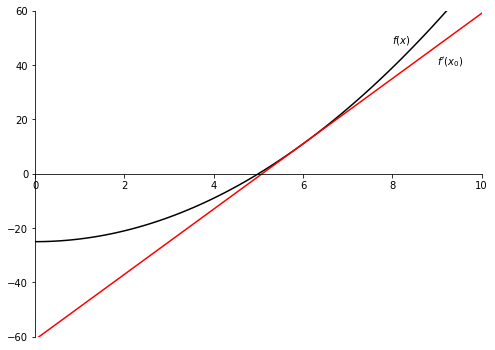

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.spines["left"].set_position("zero")
ax.spines["right"].set_color("none")
ax.yaxis.tick_left()
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_color("none")
ax.xaxis.tick_bottom()

ax.set_xlim(-0.0, 10.0)
ax.set_ylim(-60, 60)

x = np.linspace(-1, 10.0, 100)

ax.plot(x, f(x), "k-")
ax.plot(x, fprime(x0) * (x - x0) + f(x0), "r-")
ax.text(9, 40, r"$f^\prime\left(x_0\right)$")
ax.text(8, 48, r"$f\left(x\right)$")
plt.show()

### Stop Condition

We continue the successive iterations until some critical tolerance criterion has been met. The tolerance criterion can be defined as follows

$\vert x_{n+1} - x_n \vert < \epsilon$

An animation showing the root of the function $f(x) = \cos(x) - x^3$ converging to a tolerance of 0.001. An initial guess of 0.4 was used.

In [5]:
p = [0.4]

f = lambda x: np.cos(x) - x ** 3 if x is not None else None
fprime = lambda x: -3 * x ** 2 - np.sin(x) if x is not None else None

for i in range(15):

    x = p[-1] if p[-1] is not None else p[-2]

    xold = x
    x = x - f(x) / fprime(x)
    p.append(None)
    p.append(x)

    if np.abs(x - xold) < 1e-4:
        break

count = 0
subcount = 0
p_label = []
for _ in range(len(p)):

    p_label.append(r"$p_{}$".format(count))

    subcount += 1
    if subcount == 2:
        subcount = 0
        count += 1

fig, ax = plt.subplots(figsize=(8, 6))
ax.spines["left"].set_position("zero")
ax.spines["right"].set_color("none")
ax.yaxis.tick_left()
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_color("none")
ax.xaxis.tick_bottom()

ax.set_xlim(-0.2, 2.0)
ax.set_ylim(-4, 4)

x = np.linspace(-1, 3, 100)

lines = []
lines.append(ax.plot(x, f(x), "k-", label=r"$\cos(x) - x^3$")[0])
lines.append(ax.plot([], [], "k--")[0])
lines.append(ax.plot([], [], "r-")[0])
lines.append(ax.text([], [], "", fontsize=10))


def animate(i):

    lines[1].set_data([p[i], p[i]], [0.0, f(p[i])])
    if p[i] is None:
        lines[2].set_data(x, fprime(p[i - 1]) * (x - p[i - 1]) + f(p[i - 1]))
        lines[3].set_text("")

    if p[i] is not None:
        if f(p[i]) > 0:
            lines[3].set_y(f(p[i]) + 0.2)
            lines[3].set_x(p[i] - 0.05)
            lines[3].set_text(p_label[i])
        else:
            lines[3].set_y(f(p[i]) - 0.2)
            lines[3].set_x(p[i] - 0.05)
            lines[3].set_text(p_label[i])

    return


plt.close("all")
ani2 = FuncAnimation(fig, animate, frames=len(p), interval=1600)
ani2

### Pseudocode for Newton's Method.

To find a solution to $f(x) = 0$ given an initial guess $p_0$

| Steps | |
| --: | :-- |
|  1. | Set $i = 1$
|  2. | While $i \leq $max iterations, do Steps 3-6
|  3. | $\phantom{--}$ Set $p=p_0 - f(p_0)/f'(p_0)$
|  4. | $\phantom{--}$ If $\vert p - p_0 \vert < TOL$, end program and out $p$ as approximate root
|  5. | $\phantom{--}$ Set $i = i + 1$
|  6. | $\phantom{--}$ Set $p_0 = p$
|  7. | Print "Method failed to converge after 'max iterations'."

### Python/NumPy implementation of Newton's Method

In [6]:
def newton_zero(f, fp, x0, max_iterations=10000, tolerence=1e-10):

    x = x0

    for i in range(max_iterations):

        xold = x
        x = x - f(x) / fp(x)

        if np.abs(x - xold) < tolerence:
            return x

### Convergence of Newton's Method

Assume that Newton's $x_{k+1}$ iteration converges to $x^{\star}$ with $f(x^{\star}) \neq 0$. If we define

$x_k = x^\star + \epsilon_k$

and take the Taylor series expansion about $x^\star$ we have

\begin{align}
f(x_k) &= f(x^\star) + f^\prime(x^\star)\epsilon_k + \frac{1}{2} f^{\prime\prime}(x^\star)\epsilon_k^2 + \dots \\
       &= f'(x^\star)\epsilon_k + \frac{1}{2}f''(x^\star)\epsilon_k^2 + \ldots
\end{align}

or, rearranging

$$f^\prime(x_k)= f'(x^\star)+f^{\prime\prime}(x^\star)\epsilon_k + \ldots$$

But,

\begin{align}
\epsilon_{k+1} &= \epsilon_k + (x_{k+1} - x_k) \\
               &=\epsilon_k - \frac{f(x_k)}{f'(x_k)} \\
               &\approx \epsilon_k - \frac{f'(x^\star)\epsilon_k + \frac{1}{2}f''(x^\star)\epsilon_k^2}{f'(x^\star)+f''(x^\star)\epsilon_k} \\
               &\approx \frac{f''(x^\star)}{2f'(x^\star)}\epsilon_k^2
\end{align}

The last equation implies that Newton's method converges *quadratically*. That is, near a root, the number of significant digits approximately doubles with each step. This is a very strong convergence property and makes Newton's method the root finding method of choice for any function whose derivative can be evaluated efficiently and is continuous near the root.

## Secant Method

In the last section we discussed Newton's method for root finding. We said that although Newton's method has some very strong convergence properties, one disadvantage is the need to evaluate $f'(x)$, which can sometimes be messy. In order to circumvent this derivative calculation we introduce a slight variation. Recall, that by definition

$$
f'(x_{n-1}) = \lim_{x\rightarrow x_{n-1}}\frac{f(x_{n-1})-f(x_{n-2})}{x_{n-2}-x_{n-1}}.
$$

This technique is called the *secant method*. Here we need two initial approximations $x_0$ and $x_1$, although they do not need to be bound by the root.

### Secant Method Examples

An animation showing the root of the function $f(x) = \cos(x) - x^3$ converging to a tolerance of 0.05. The initial guesses of 0.1 and 1.4 were used.

In [7]:
def secant_zero_animate(p0, p1):

    f = lambda x: np.cos(x) - x ** 3 if x is not None else None

    p0 = [p0]
    p1 = [p1]
    pnew = [None]

    q0 = f(p0[-1])
    q1 = f(p1[-1])

    for _ in range(100):
        if p1 is not None and p0 is not None:
            p = p1[-1] - q1 * (p1[-1] - p0[-1]) / (q1 - q0)
        if np.abs(p - p1[-1]) < 0.05:
            break
        p0.append(None)
        p1.append(None)

        if p0[-1] is not None:
            p0.append(p1[-1])
        else:
            p0.append(p1[-2])
        p1.append(p)

        q0 = q1
        q1 = f(p)

        pnew.append(p)
        pnew.append(None)

    count = 0
    subcount = 0
    p0_label = []
    p1_label = []
    pnew_label = []
    for _ in range(len(p0)):

        p0_label.append(r"$p_{}$".format(count))
        p1_label.append(r"$p_{}$".format(count + 1))
        pnew_label.append(r"$p_{}$".format(count + 2))

        subcount += 1
        if subcount == 2:
            subcount = 0
            count += 1

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.spines["left"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.yaxis.tick_left()
    ax.spines["bottom"].set_position("zero")
    ax.spines["top"].set_color("none")
    ax.xaxis.tick_bottom()

    ax.set_xlim(-0.2, 2.0)
    ax.set_ylim(-4, 4)

    x = np.linspace(-1, 3, 100)

    lines = []
    lines.append(ax.plot(x, f(x), "k-", label=r"$\cos(x) - x^3$")[0])
    lines.append(ax.plot([], [], "r--")[0])
    lines.append(ax.plot([], [], "k--")[0])
    lines.append(ax.plot([], [], "k--")[0])
    lines.append(ax.plot([], [], "r-")[0])
    lines.append(ax.text([], [], "", fontsize=10))
    lines.append(ax.text([], [], "", fontsize=10))
    lines.append(ax.text([], [], "", fontsize=10, color="r"))

    def animate(i):

        if p0[i] is not None:
            lines[2].set_data([p0[i], p0[i]], [0.0, f(p0[i])])
            lines[3].set_data([p1[i], p1[i]], [0.0, f(p1[i])])

            if f(p0[i]) > 0:
                lines[5].set_y(f(p0[i]) + 0.2)
            else:
                lines[5].set_y(f(p0[i]) - 0.2)

            if f(p1[i]) > 0:
                lines[6].set_y(f(p1[i]) + 0.2)
            else:
                lines[6].set_y(f(p1[i]) - 0.2)

            lines[5].set_x(p0[i] - 0.05)
            lines[5].set_text(p0_label[i])
            lines[6].set_x(p1[i] - 0.05)
            lines[6].set_text(p1_label[i])
            lines[7].set_text("")

        else:
            lines[1].set_data([pnew[i], pnew[i]], [0.0, f(pnew[i])])

            if f(pnew[i]) > 0:
                lines[7].set_y(f(pnew[i]) + 0.2)
            else:
                lines[7].set_y(f(pnew[i]) - 0.2)
            lines[7].set_x(pnew[i] - 0.05)
            lines[7].set_text(pnew_label[i])

        if p0[i] is not None:
            lines[4].set_data(
                x, (f(p1[i]) - f(p0[i])) / (p1[i] - p0[i]) * (x - p1[i]) + f(p1[i])
            )

        return

    plt.close("all")
    return FuncAnimation(fig, animate, frames=len(pnew), interval=1600)


secant_zero_animate(0.1, 1.4)

This is another simulation for the same problem, but this time the initial guesses are 1.2 and 1.4. This demonstrates that the secant method guesses do not have to be bound by the root.

In [8]:
secant_zero_animate(1.2, 1.4)

### Pseudocode for Secant Method

To find a solution to $f(x) = 0$ given initial guesses of $p_0$ and $p_1$:

| Steps | |
| --: | :-- |
| 1.  | Set $i = 2$
| 2.  | Set $q_0 = f(p_0)$
| 3.  | Set $q_1 = f(p_1)$
| 4.  | While $i \leq$ max iterations, do Steps 5-12
| 5.  | $\phantom{--}$ Set $p = p_1 - q_1(p_1 - p_0) / (q_1 - q_0)$
| 6.  | $\phantom{--}$ If $\vert p - p_1 \vert < TOL$, end program and out $p$ as approximate root.
| 7.  | $\phantom{--}$ Set $i = i+1$
| 8.  | $\phantom{--}$ Set $p_0 = p_1$
| 9.  | $\phantom{--}$ Set $q_0 = q_1$
| 10. | $\phantom{--}$ Set $p_1 = p$
| 11. | $\phantom{--}$ Set $q_1 = f(p)$
| 12. | $\phantom{--}$ Set $i = i + 1$
| 13. | Print "Method failed to converge after 'max iterations'."

### Python/NumPy implementation of Secant Method

In [9]:
def secant_zero(f, p0, p1, max_iterations=10000, tolerence=1e-10):

    q0 = f(p0)
    q1 = f(p1)

    for _ in range(max_iterations):
        p = p1 - q1 * (p1 - p0) / (q1 - q0)
        if np.abs(p - p1) < tolerence:
            return p
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)

    return

### Convergence and Other Comments

It can be shown that the order of convergence of the secant method is the "golden ratio"

$$
\alpha = \frac{1+\sqrt{5}}{2} \approx 1.618
$$

This means that the error follows the following relationship:

$$
\lim_{k\rightarrow \infty} |\epsilon_{k+1}| \approx \mbox{constant} \times |\epsilon_k|^\alpha
$$

The secant method has the disadvantage that the root does not necessarily remain bracketed. For functions that are not sufficiently continuous, the algorithm is not guaranteed to converge. Local behavior might send it off toward infinity. There is a slight modification to the secant method called the *false position method* that will keep the root bracketed and therefore guarantee convergence, but at a slower rate. A better method to guarantee convergence would be to combine the secant method with the bisection method, therefore we will not discuss the false position method.

## Hybrid Methods

Hybrid methods simply combine two or more root finding methods to create a robust algorithm. For example, Brent's Method uses the Bisection Method  to get near the root, then the Secant Method is used to polish it off for faster convergence.

In [11]:
%%javascript
function hideElements(elements, start) {
for(var i = 0, length = elements.length; i < length;i++) {
    if(i >= start) {
        elements[i].style.display = "none";
    }
}
}
var prompt_elements = document.getElementsByClassName("prompt");
hideElements(prompt_elements, 0)

<IPython.core.display.Javascript object>